# Titanic Dataset Visualization
This notebook explores the Titanic dataset using basic visualizations and insights. The goal is to understand survival patterns based on various features.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic_data = sns.load_dataset('titanic')

# Preview the data
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
print("Shape of dataset:", titanic_data.shape)
print("Missing values:\n", titanic_data.isnull().sum())

Shape of dataset: (891, 15)
Missing values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [3]:
# Fill missing values with simple methods
titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3-2481027651.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)
/tmp/ipython-input-3-2481027651.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [4]:
# Create new feature: is_child
titanic_data['is_child'] = titanic_data['age'].apply(lambda x: 1 if x < 12 else 0)

## Survival Count

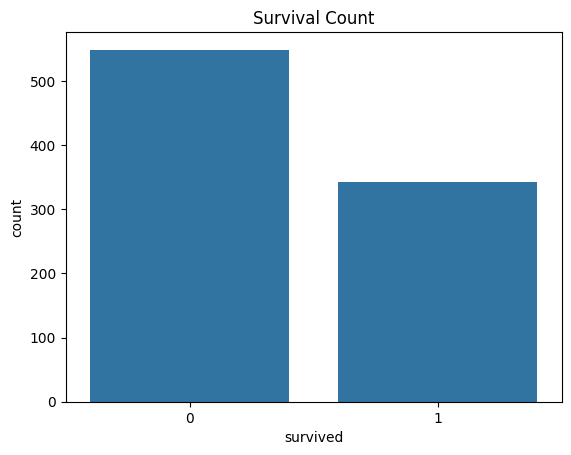

In [10]:
sns.countplot(x='survived', data=titanic_data)
plt.title('Survival Count')
plt.show()

## Survival by Gender

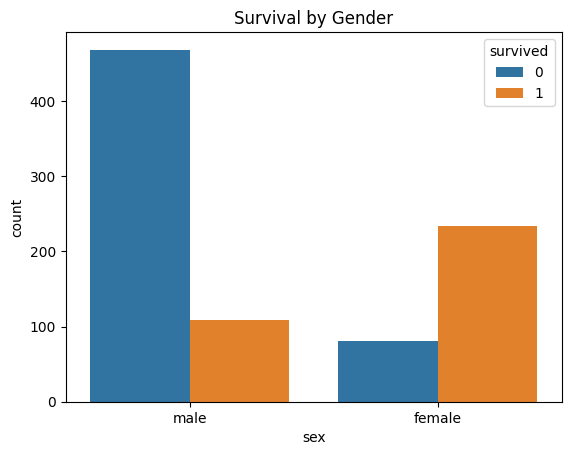

In [11]:
sns.countplot(x='sex', hue='survived', data=titanic_data)
plt.title('Survival by Gender')
plt.show()

## Age Distribution

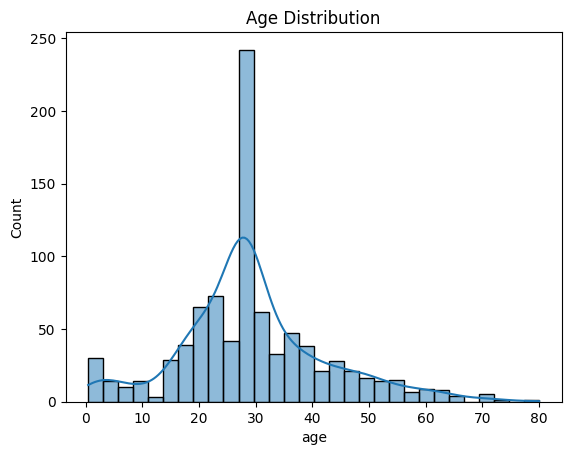

In [12]:
sns.histplot(titanic_data['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

## Family Size and Survival
We derive a new column `family_size` and analyze its effect on survival.

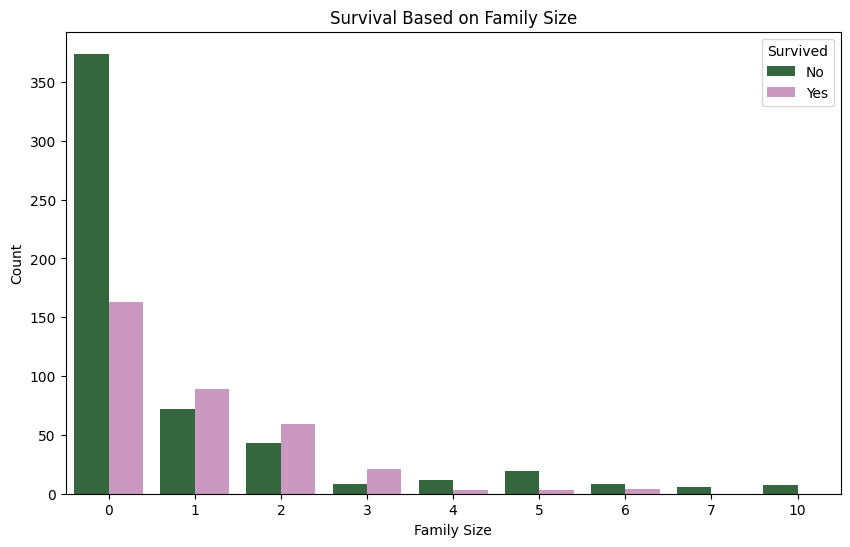

In [17]:
titanic_data['family_size'] = titanic_data['sibsp'] + titanic_data['parch']

plt.figure(figsize=(10, 6))
sns.countplot(x='family_size', hue='survived', data=titanic_data, palette='cubehelix')
plt.title('Survival Based on Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

## Fare Distribution and Survival
This plot shows how fare values vary between survivors and non-survivors.

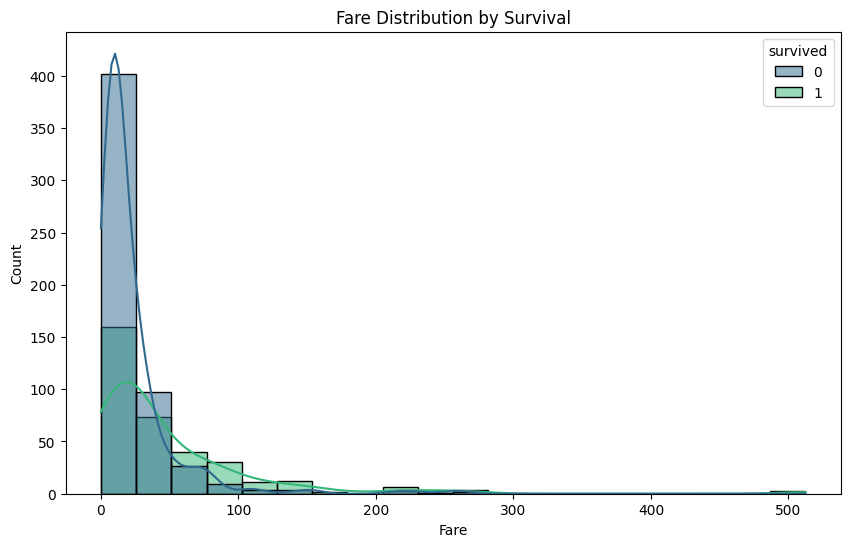

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data, x='fare', hue='survived', bins=20, kde=True, palette='viridis')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

## Child vs Adult Survival

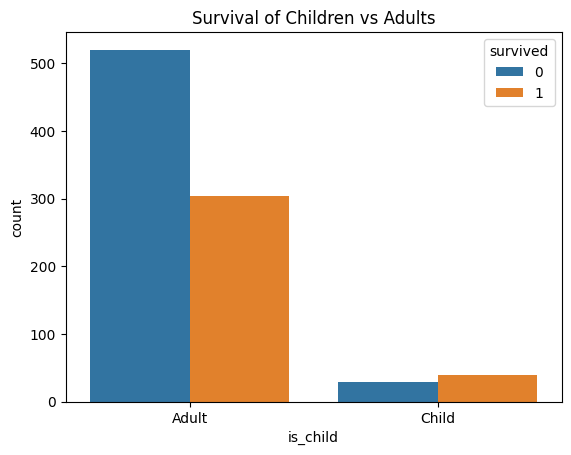

In [13]:
sns.countplot(x='is_child', hue='survived', data=titanic_data)
plt.title('Survival of Children vs Adults')
plt.xticks([0, 1], ['Adult', 'Child'])
plt.show()

## Passenger Class Distribution
Below we examine how many passengers were in each class (1st, 2nd, 3rd). This helps us understand the socioeconomic makeup of the passengers.



Pclass Distribution:
 pclass
3    491
1    216
2    184
Name: count, dtype: int64


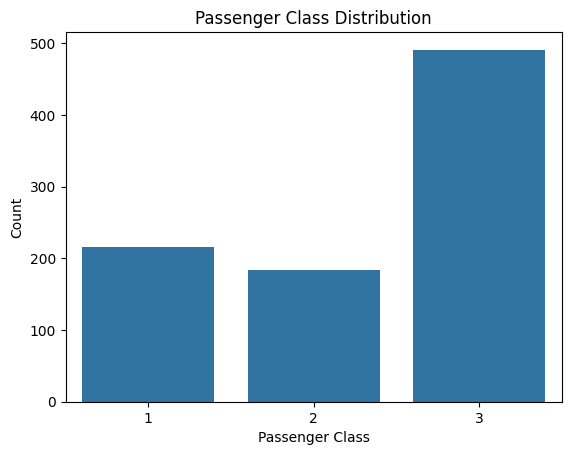

In [16]:
# Passenger Class Distribution
print("\nPclass Distribution:\n", titanic_data['pclass'].value_counts())

sns.countplot(x='pclass', data=titanic_data)
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


## Fare Distribution by Class

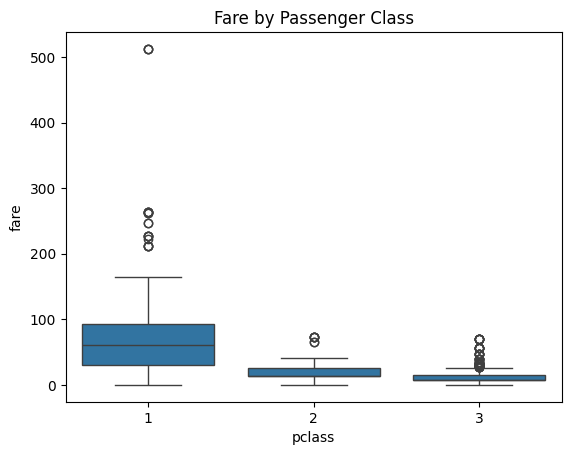

In [19]:
sns.boxplot(x='pclass', y='fare', data=titanic_data)
plt.title('Fare by Passenger Class')
plt.show()

## Summary

- Women and children had higher survival rates.
- First class passengers, who generally paid higher fares, had better survival chances.
- Fare positively correlates with survival — passengers who paid more had better outcomes.
- Family size played a role: passengers with 1–3 family members had higher survival rates, while those with large families had lower chances.
- Overall, socio-economic status, age, and family situation all influenced survival.